C:\Users\ALVIN SUDHAN\AppData\Local\Temp\ipykernel_13268\304556210.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', np.nan, inplace=True)


 model parameters:
intercept (θ₀): 39.9358610211705
slope (θ₁): -0.15784473335365387

 evaluation metrics (from scratch):
MSE  = 23.9437
RMSE = 4.8932
R²   = 0.6059


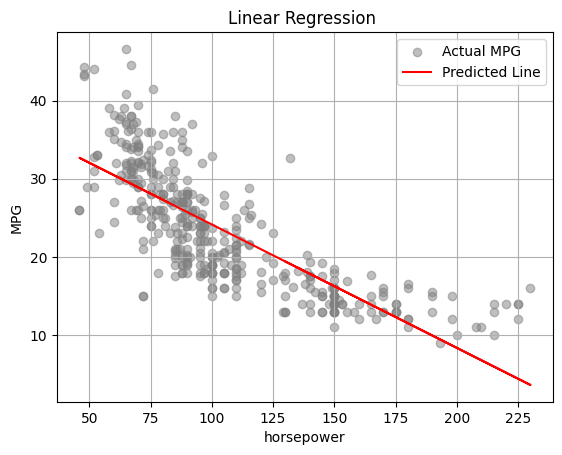

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("auto-mpg.csv")
df['horsepower'].replace('?', np.nan, inplace=True)
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.dropna(subset=['horsepower'], inplace=True)
X = df[['horsepower']].values
y = df['mpg'].values.reshape(-1, 1)
X_b = np.c_[np.ones((X.shape[0], 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
y_pred = X_b.dot(theta_best)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(" model parameters:")
print("intercept (θ₀):", theta_best[0][0])
print("slope (θ₁):", theta_best[1][0])
print("\n evaluation metrics (from scratch):")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

plt.scatter(X, y, alpha=0.5, color='gray', label='Actual MPG')
plt.plot(X, y_pred, color='red', label='Predicted Line')
plt.xlabel('horsepower')
plt.ylabel('MPG')
plt.title('Linear Regression ')
plt.legend()
plt.grid(True)
plt.show()